# Balancing dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

### Import dataset

In [2]:
df = pd.read_pickle('extended_dataset_preprocessed.pkl')
df.head()

mean                                                              \
  FlowDuration                                                               
            00        01        02        03        04        05        06   
0    -0.010075 -0.011899 -0.011080 -0.008082 -0.013610 -0.009919 -0.009839   
1    -0.007491 -0.005755 -0.008916 -0.006318 -0.012004 -0.007014 -0.006875   
2    -0.010075 -0.011899 -0.011080 -0.008082 -0.013610 -0.009919 -0.009839   
3    -0.010075 -0.011899 -0.011080 -0.008082 -0.013610 -0.009919 -0.009702   
4    -0.007494 -0.005762 -0.008920 -0.006337 -0.012023 -0.006979 -0.006933   

                                     ...            max                      \
                                     ...          Bytes                       
         07        08        09      ...             19        20        21   
0 -0.014341 -0.011996 -0.014402      ...      -0.015291 -0.014971 -0.016604   
1 -0.012524 -0.009454 -0.011688      ...      -0.015272 -0.014951 -0.016588   
2 -0.013046 -0.009527 -0.011701      ...      -0.015291 -0.014971 -0.016604   
3 -0.012816 -0.009726 -0.012442      ...      -0.015218 -0.014914 -0.016604   
4 -0.012532 -0.009452 -0.011691      ...      -0.015270 -0.014933 -0.016579   

                               Label  \
                               Label   
         22        23 anon_net_range   
0 -0.016766 -0.016320           26.0   
1 -0.016749 -0.016304           26.0   
2 -0.016766 -0.016320           26.0   
3 -0.016766 -0.016320           26.0   
4 -0.016739 -0.016297           26.0   

                                                           \
                                                            
                                          addr_range unit   
0  ec53ecd75327bafb5534fc04eb3b7f41cac0cd7664a19f...  UVT   
1  7408e51607e13c73bda262bcec8a9a125a8fd13407bfbe...  UVT   
2  a4ad915be80ba3536c409f3181298b3f86c57cd3db64fc...  UVT   
3  ce6015ad550d384fc556b815893909f016d19aa988107f...  UVT   
4  25b945e7272206d17fe1371826ae7e9b01b7b9a1fe09e9...  UVT   

                            Unit_encoding  
                                           
                    subunit                
0   pracovni sit pro sitare            20  
1   pracovni sit pro sitare            20  
2   pracovni sit pro sitare            20  
3   pracovni sit pro sitare            20  
4   pracovni sit pro sitare            20  

[5 rows x 653 columns]

In [3]:
df.shape

(31501, 653)

## Visualize the imbalances

In [4]:
df['Label', 'Label', 'unit'].value_counts()

UVT              14003
SKM               3246
PrirF             2599
CEITEC            2223
LF                1475
FI                1289
FF                1089
FIeduroamnaFI     1020
FSS                802
PedF               740
UKB                649
ESF                554
PravF              536
RMU                429
FSpS               410
Teiresias          130
Telc                99
IBA                 96
VPN                 83
CTT                 19
FNBrno               7
CESNET               3
Name: (Label, Label, unit), dtype: int64

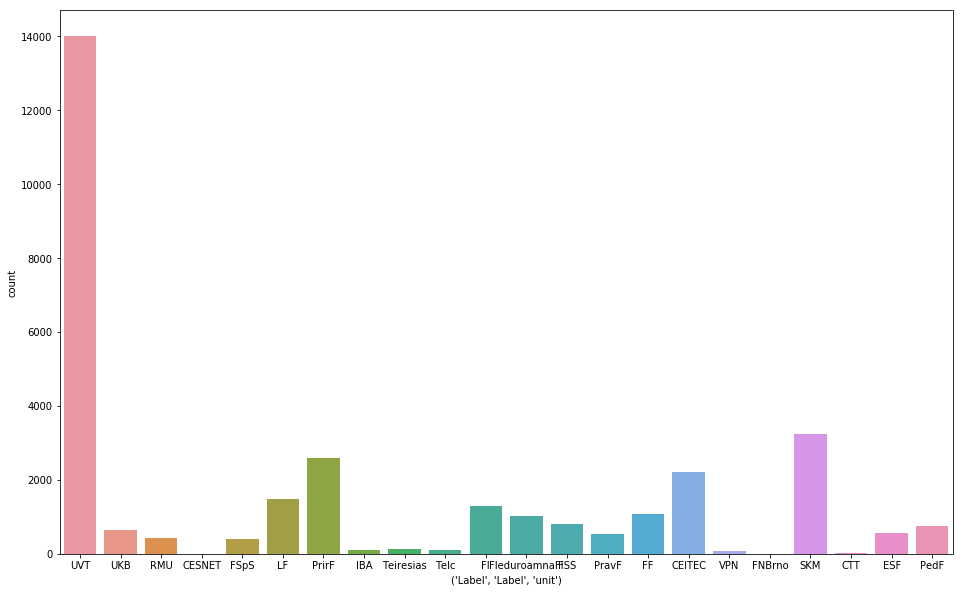

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(x=('Label', 'Label', 'unit'), data=df, ax=ax)

## Undersampling of dominant host unit in extended dataset

Since **UVT** hosts represent an overwhelming majority in our dataset. We will use random undersampler to balance the unit counts

set a number to undersample to:

In [6]:
m_resample = int(df[df['Label', 'Label', 'unit'] == 'UVT'].shape[0] / 4)

#### Setting up random undersampler

In [7]:
sampler = RandomUnderSampler(sampling_strategy={20 : m_resample})

_for randomundersampler_

In [8]:

x = df.drop(('Unit_encoding', '', ''), level=0, axis=1)
y = df['Unit_encoding']
resample_x, resample_y = sampler.fit_resample(x, y)
df = pd.DataFrame(resample_x, columns=x.columns)
df['Unit_encoding', '', ''] = resample_y
df.head()

mean                                                             \
  FlowDuration                                                              
            00          01          02          03         04          05   
0   -0.0076218  -0.0061033 -0.00901875  -0.0064218 -0.0120994 -0.00714079   
1  -0.00967743  -0.0110739  -0.0107901 -0.00808154 -0.0136098 -0.00986328   
2  -0.00948369  -0.0104265  -0.0108963 -0.00808009 -0.0136085 -0.00991762   
3  -0.00993164  -0.0111256  -0.0107616 -0.00798433 -0.0135953  -0.0099185   
4  -0.00748368 -0.00578955 -0.00893008 -0.00632163  -0.012029 -0.00700721   

                                                     ...             max  \
                                                     ...           Bytes   
           06         07          08         09      ...              19   
0 -0.00706907 -0.0126159 -0.00957151 -0.0118509      ...      -0.0152904   
1 -0.00974263 -0.0143397  -0.0115096 -0.0141186      ...      -0.0152906   
2 -0.00983781 -0.0143201  -0.0115449 -0.0139219      ...      -0.0152906   
3 -0.00947003 -0.0143409  -0.0119786 -0.0142301      ...      -0.0152906   
4 -0.00691079 -0.0125376 -0.00944081 -0.0117058      ...      -0.0152744   

                                                       Label  \
                                                       Label   
          20         21         22         23 anon_net_range   
0 -0.0149713 -0.0166037  -0.016766 -0.0163198             28   
1 -0.0149715 -0.0166038 -0.0167662   -0.01632             28   
2 -0.0149715 -0.0166038 -0.0167662   -0.01632             28   
3 -0.0149715 -0.0166038 -0.0167662   -0.01632             28   
4 -0.0149548 -0.0165885 -0.0167515 -0.0163074             26   

                                                              \
                                                               
                                          addr_range    unit   
0  ef160f55b36bd48b37f22bc9c48819b1a0259c2dd27ccc...  CEITEC   
1  93b8f5a052053b0db4731b671f78b8c5e5817d38d51ba9...  CEITEC   
2  ac600c8985d0f198d532737ea9d58db00905c6c6bebb6b...  CEITEC   
3  48bab257d30b1c6eaa225275fe60fc5e1dfe61afe54ace...  CEITEC   
4  1cd00c373ace404b829e822bf076631b564bf2bc70db82...  CEITEC   

                                                     Unit_encoding  
                                                                    
                                             subunit                
0   frontendy diskovych poli a aplikacni servery ...             0  
1   frontendy diskovych poli a aplikacni servery ...             0  
2   frontendy diskovych poli a aplikacni servery ...             0  
3   frontendy diskovych poli a aplikacni servery ...             0  
4                                                CRS             0  

[5 rows x 653 columns]

In [9]:
df['Label', 'Label', 'unit'].value_counts()

UVT              3500
SKM              3246
PrirF            2599
CEITEC           2223
LF               1475
FI               1289
FF               1089
FIeduroamnaFI    1020
FSS               802
PedF              740
UKB               649
ESF               554
PravF             536
RMU               429
FSpS              410
Teiresias         130
Telc               99
IBA                96
VPN                83
CTT                19
FNBrno              7
CESNET              3
Name: (Label, Label, unit), dtype: int64

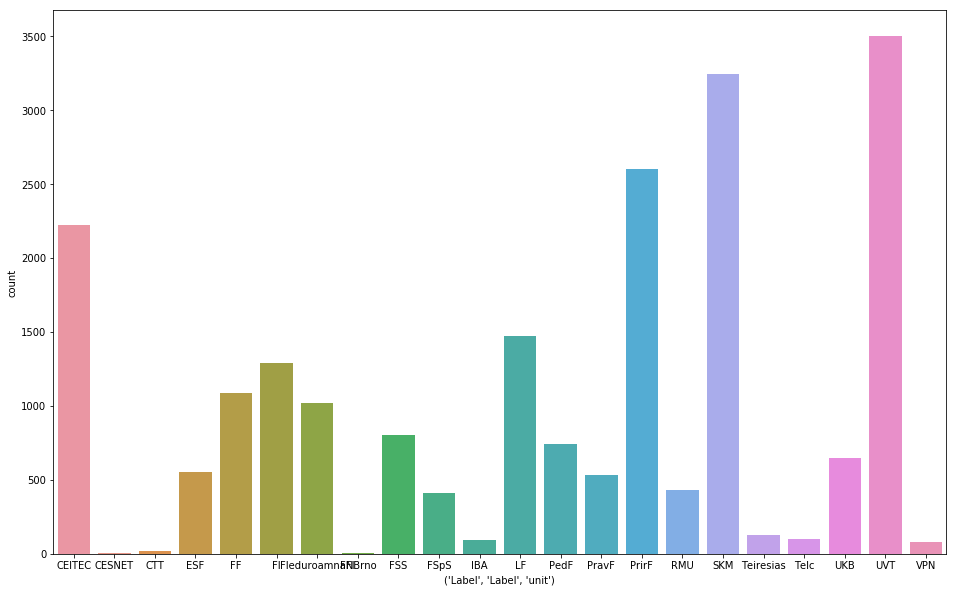

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(x=('Label', 'Label', 'unit'), data=df, ax=ax)

### Fix column dtypes

Our feature columns should be of dtype **float64** 

In [11]:
df.dtypes

mean           FlowDuration  00                object
                             01                object
                             02                object
                             03                object
                             04                object
                             05                object
                             06                object
                             07                object
                             08                object
                             09                object
                             10                object
                             11                object
                             12                object
                             13                object
                             14                object
                             15                object
                             16                object
                             17                object
                            

In [12]:
for column in df:
    if column[0] == 'Label':
        break
    df[column] = pd.to_numeric(df[column])

In [13]:
df.dtypes

mean           FlowDuration  00                float64
                             01                float64
                             02                float64
                             03                float64
                             04                float64
                             05                float64
                             06                float64
                             07                float64
                             08                float64
                             09                float64
                             10                float64
                             11                float64
                             12                float64
                             13                float64
                             14                float64
                             15                float64
                             16                float64
                             17                float64
          

In [14]:
pd.to_pickle(df, 'balanced_preprocessed_dataset.pkl')